## Pandas

## Installation

In [ ]:
%pip install pandas

## Ways of importing a file in google Colab

Importing File directly into google Colab

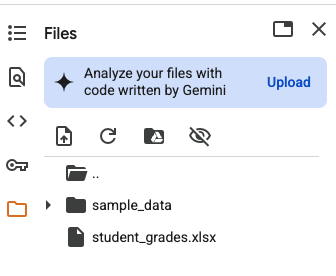

In [ ]:
import pandas as pd

path = '/content/students_grades.csv'

df = pd.read_csv(path)
print(df.head(10))

   student_id           name  subject  grade
0           1  Alice Johnson     Math     85
1           2      Bob Smith     Math     78
2           3    Charlie Lee     Math     92
3           4  Alice Johnson  Science     88
4           5      Bob Smith  Science     75
5           6    Charlie Lee  Science     95
6           7  Alice Johnson  History     90
7           8      Bob Smith  History     70
8           9    Charlie Lee  History     85


## Import Using Code

In [ ]:
from google.colab import files
uploaded = files.upload()

import io

filename = list(uploaded.keys())[0]
print(filename)
df = pd.read_csv(io.BytesIO(uploaded[filename]))
print(df)

Saving students_grades2.csv to students_grades2 (1).csv
students_grades2 (1).csv
   student_id           name  subject  grade
0           1  Alice Johnson     Math     85
1           2      Bob Smith     Math     78
2           3    Charlie Lee     Math     92
3           4  Alice Johnson  Science     88
4           5      Bob Smith  Science     75
5           6    Charlie Lee  Science     95
6           7  Alice Johnson  History     90
7           8      Bob Smith  History     70
8           9    Charlie Lee  History     85


## Understanding common Panda functions

In [ ]:
path = '/content/students_grades.csv'

df = pd.read_csv(path) # Read a CSV
print(df.head(10)) # Default return 5 rows

# print(df.info()) # Data types & null

# print(df.describe()) # Summarise stats

print(df.shape) # Return Rows and columns count





   student_id           name  subject  grade
0           1  Alice Johnson     Math     85
1           2      Bob Smith     Math     78
2           3    Charlie Lee     Math     92
3           4  Alice Johnson  Science     88
4           5      Bob Smith  Science     75
5           6    Charlie Lee  Science     95
6           7  Alice Johnson  History     90
7           8      Bob Smith  History     70
8           9    Charlie Lee  History     85
(9, 4)


## Accessing the CSV Data

In [ ]:
path = '/content/students_grades.csv'

df = pd.read_csv(path) # Read a CSV
#print(df['name']) # Selecting a single column
#print(df[['subject', 'grade']]) #. Selecting multiple columns

# print(df.iloc[0]) # Row by position
#print(df.loc[:,'name']) # Row by label/index

print(df.iloc[0:5]) # Slice rows



   student_id           name  subject  grade
0           1  Alice Johnson     Math     85
1           2      Bob Smith     Math     78
2           3    Charlie Lee     Math     92
3           4  Alice Johnson  Science     88
4           5      Bob Smith  Science     75


## Filtering Rows

In [ ]:
path = '/content/students_grades.csv'

df = pd.read_csv(path)

print(df[df['subject'] == 'Math'])

   student_id           name subject  grade
0           1  Alice Johnson    Math     85
1           2      Bob Smith    Math     78
2           3    Charlie Lee    Math     92


# Creating and modifying Columns

In [ ]:
#df['new_col'] = df['subject'] + df['name']

avg_per_student = df.groupby('subject')['grade'].transform('mean')

df['average'] = avg_per_student

print(df)



   student_id           name  subject  grade    average
0           1  Alice Johnson     Math     85  85.000000
1           2      Bob Smith     Math     78  85.000000
2           3    Charlie Lee     Math     92  85.000000
3           4  Alice Johnson  Science     88  86.000000
4           5      Bob Smith  Science     75  86.000000
5           6    Charlie Lee  Science     95  86.000000
6           7  Alice Johnson  History     90  81.666667
7           8      Bob Smith  History     70  81.666667
8           9    Charlie Lee  History     85  81.666667


# Aggregating and Grouping

In [ ]:
print(df.groupby('subject')['grade'].agg(['min', 'max']))

         min  max
subject          
History   70   90
Math      78   92
Science   75   95


# Sorting

In [ ]:
print(df.sort_values(by='subject', ascending=True)  )

   student_id           name  subject  grade    average
6           7  Alice Johnson  History     90  81.666667
7           8      Bob Smith  History     70  81.666667
8           9    Charlie Lee  History     85  81.666667
0           1  Alice Johnson     Math     85  85.000000
1           2      Bob Smith     Math     78  85.000000
2           3    Charlie Lee     Math     92  85.000000
3           4  Alice Johnson  Science     88  86.000000
4           5      Bob Smith  Science     75  86.000000
5           6    Charlie Lee  Science     95  86.000000


# Handle Missing Data

In [ ]:
df['average'] = None

print(df)

   student_id           name  subject  grade average
0           1  Alice Johnson     Math     85    None
1           2      Bob Smith     Math     78    None
2           3    Charlie Lee     Math     92    None
3           4  Alice Johnson  Science     88    None
4           5      Bob Smith  Science     75    None
5           6    Charlie Lee  Science     95    None
6           7  Alice Johnson  History     90    None
7           8      Bob Smith  History     70    None
8           9    Charlie Lee  History     85    None


In [ ]:
print(df.isnull().sum())
#df.dropna()                        # Drop rows with nulls
#df.fillna(0)                     # Fill missing with 0
print(df)

student_id    0
name          0
subject       0
grade         0
average       9
dtype: int64
   student_id           name  subject  grade average
0           1  Alice Johnson     Math     85    None
1           2      Bob Smith     Math     78    None
2           3    Charlie Lee     Math     92    None
3           4  Alice Johnson  Science     88    None
4           5      Bob Smith  Science     75    None
5           6    Charlie Lee  Science     95    None
6           7  Alice Johnson  History     90    None
7           8      Bob Smith  History     70    None
8           9    Charlie Lee  History     85    None


# Merge and Join

In [ ]:
path1 = '/content/students_grades.csv'
path2 = '/content/students_grades2.csv'
df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)

print(pd.merge(df1, df2, on='student_id')) #merge by column
#print(df1.join(df2, how='left'))          # Join by index

   student_id         name_x subject_x  grade_x         name_y subject_y  \
0           1  Alice Johnson      Math       85  Alice Johnson      Math   
1           2      Bob Smith      Math       78      Bob Smith      Math   
2           3    Charlie Lee      Math       92    Charlie Lee      Math   
3           4  Alice Johnson   Science       88  Alice Johnson   Science   
4           5      Bob Smith   Science       75      Bob Smith   Science   
5           6    Charlie Lee   Science       95    Charlie Lee   Science   
6           7  Alice Johnson   History       90  Alice Johnson   History   
7           8      Bob Smith   History       70      Bob Smith   History   
8           9    Charlie Lee   History       85    Charlie Lee   History   

   grade_y  
0       85  
1       78  
2       92  
3       88  
4       75  
5       95  
6       90  
7       70  
8       85  


# Exporting Data

In [ ]:
df.to_csv('cleaned.csv', index=False)